In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pickle as pkl
with open('data/172/extracted_cells.pkl','br') as pkl_file:
    E=pkl.load(pkl_file)
    Examples=E['Examples']
len(Examples)

1298

In [4]:
[e for e in Examples if e['area']>100000]

[]

(0.0, 30.0)

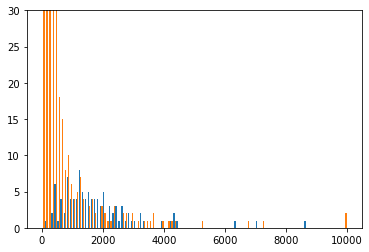

In [23]:
pos=[min(e['area'],10000) for e in Examples if e['label']==1]
neg=[min(e['area'],10000) for e in Examples if e['label']==0]
hist([pos,neg], 100, histtype='bar');
#xlim([0,4000])
ylim([0,30])

In [21]:
max(pos)

4000

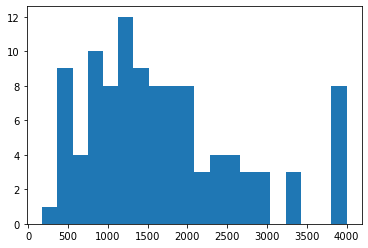

In [19]:
hist(pos,bins=20);

In [24]:
min(pos),min(neg)
import cv2

In [25]:
df_dict=None
thresh=2000
for i in range(len(Examples)):
    e=Examples[i]

    Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))

    if Stats[1] is None:
        continue
    seg=Stats[1]

    # Isolate the connected component at the middle of seg
    middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
    middle_seg=seg[middle[0],middle[1]]
    middle_seg_mask = np.uint8(seg==middle_seg)

    # Calculate Moments
    moments = cv2.moments(middle_seg_mask)
    # Calculate Hu Moments
    huMoments = cv2.HuMoments(moments)
    
    features={'h%d'%i:huMoments[i,0]  for i in range(7)}
    features.update(moments)

    for key in ['index','label','area','height2','width2']:
        features[key]=e[key]

    if df_dict==None:
        df_dict={}
        for key in features:
            df_dict[key]=[]

    for key in features:
        df_dict[key].append(features[key])


In [27]:
import pandas as pd
df=pd.DataFrame(df_dict)
print(df.shape)
df.head()

(5504, 36)


,h0,h1,h2,h3,h4,h5,h6,m00,m10,m01,...,nu02,nu30,nu21,nu12,nu03,index,label,area,height2,width2
0,0.169095,0.003009,0.000086,1.351580e-06,1.014508e-11,4.923695e-08,-1.045499e-11,66.0,3285.0,3299.0,...,0.078738,-0.001466,0.001642,0.001992,-0.000605,1,0,66,50,50
1,0.173598,0.004454,0.000012,3.201715e-07,-6.063278e-13,-2.050287e-08,1.051879e-13,152.0,7508.0,7638.0,...,0.065898,-0.000878,-0.000532,0.000708,-0.000008,1,0,152,50,50
2,0.175694,0.007167,0.000642,2.452732e-05,-3.078724e-09,-2.076505e-06,0.000000e+00,13.0,650.0,652.0,...,0.045517,0.000000,0.007574,0.000000,-0.002622,2,0,13,50,50
3,0.184722,0.006919,0.000431,2.099855e-05,-3.226107e-10,-2.250764e-07,-1.972153e-09,87.0,4278.0,4307.0,...,0.085579,0.004822,-0.004826,-0.000288,0.005495,3,0,87,50,50
4,0.229728,0.012214,0.001709,2.843355e-04,1.981430e-07,2.836821e-05,4.732176e-09,28.0,1388.0,1407.0,...,0.088329,-0.002715,0.010951,-0.009539,0.000633,4,0,28,50,50


In [28]:
df.to_csv('puntas.csv')

In [136]:
!head puntas.csv

,h0,h1,h2,h3,h4,h5,h6,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,index,label,area,height2,width2
0,0.38653594444444445,0.12163226109615961,3.747461943541054e-26,3.794543511135654e-26,1.4308955110988187e-51,1.3233761428235606e-26,2.2826495527840455e-56,51000000.0,382474500000.0,86674500000.0,3824617508500000.0,650015412750000.0,196433308500000.0,4.302551269124639e+19,6.499937455695747e+18,1.4731515970957443e+18,5.0083126335e+17,956249995750000.0,0.0,49129995750000.0,-3612672.0,-3072.0,-5632.0,0.0,0.3676470571895425,0.0,0.01888888725490196,-1.9449260483374234e-13,-1.6538486805590335e-16,-3.032055914358228e-16,0.0,0,0,203997354,6800,30000
1,0.2840805644059966,0.05333927976537636,0.0005503795883675954,0.0002747396079323795,1.0622270133203711e-07,6.173136068783497e-05,1.1420574798599163e-08,26.0,1283.0,1290.0,63485.0,63651.0,64022.0,3149963.0,3149277.0,3158685.0,3178278.0,173.88461538461706,-5.538461538460979,18.153846153836

In [80]:
import cv2
thresh=2000
Stats=cv2.connectedComponentsWithStats(np.int8(e['image']>thresh))
Stats[0]

3

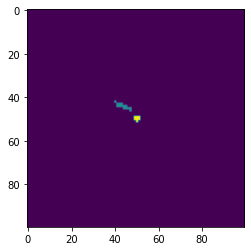

In [81]:
seg=Stats[1]
imshow(seg)


In [82]:
middle=np.array(np.array(seg.shape)/2,dtype=np.int16)
middle

array([50, 50], dtype=int16)

In [83]:
middle_seg=seg[middle[0],middle[1]]
middle_seg

2

In [86]:
Stats[2][middle_seg],e['area']

(array([49, 49,  3,  3,  7], dtype=int32), 7)

In [122]:
for key in ['index','label','area','height2','width2']:
    features[key]=e[key]
features

{'h0': 0.19996952888869568,
 'h1': 0.004807484490333493,
 'h2': 0.0029203280141626353,
 'h3': 0.00016871685648051798,
 'h4': 1.0003237196370746e-07,
 'h5': 8.329713986313898e-06,
 'h6': 6.339290075281958e-08,
 'm00': 1599.0,
 'm10': 82733.0,
 'm01': 99098.0,
 'm20': 4458461.0,
 'm11': 5169807.0,
 'm02': 6475062.0,
 'm30': 248329187.0,
 'm21': 280669813.0,
 'm12': 341828093.0,
 'm03': 443725004.0,
 'mu20': 177817.29205753654,
 'mu11': 42430.618511569686,
 'mu02': 333464.99937460944,
 'mu30': -754346.4337663054,
 'mu21': -33997.44442487601,
 'mu12': 1546114.6932338718,
 'mu03': 1100161.5409317613,
 'nu20': 0.06954678602579416,
 'nu11': 0.016595197870921393,
 'nu02': 0.1304227428629015,
 'nu30': -0.007378187406689129,
 'nu21': -0.00033252562097077954,
 'nu12': 0.015122393966866952,
 'nu03': 0.010760570559204253,
 'index': 66,
 'label': 1,
 'area': 1599,
 'height2': 66,
 'width2': 50}

In [ ]:
# Calculate Moments
moments = cv2.moments(im)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)

In [30]:
def plot_dist(uimg):
    H=uimg.flatten()
    H=np.sort(H)

    H=H[0:-1:10]
    plt.figure()
    plt.plot(H,np.arange(0,1,1./H.shape[0]))
    plt.grid()
    plt.figure()
    plt.hist(H,bins=100);

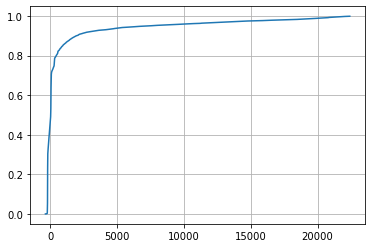

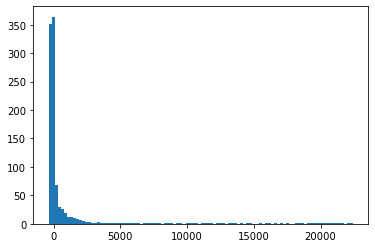

In [31]:
plot_dist(e['image']);

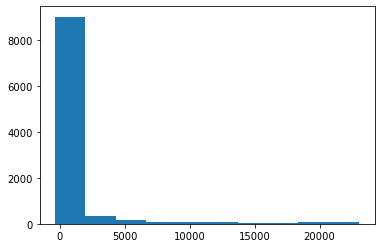

In [29]:
hist(e['image'].flatten());